In [1]:
import numpy as np 
from sklearn.datasets import fetch_openml 

In [2]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
print(mnist.DESCR)

C:\Users\armen\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
#To check data structure first
import matplotlib.pyplot as plt 
import pandas as pd             

X, y = mnist["data"], mnist["target"]
print("Shape of X:", X.shape)  
print("Shape of y:", y.shape)  


Shape of X: (70000, 784)
Shape of y: (70000,)


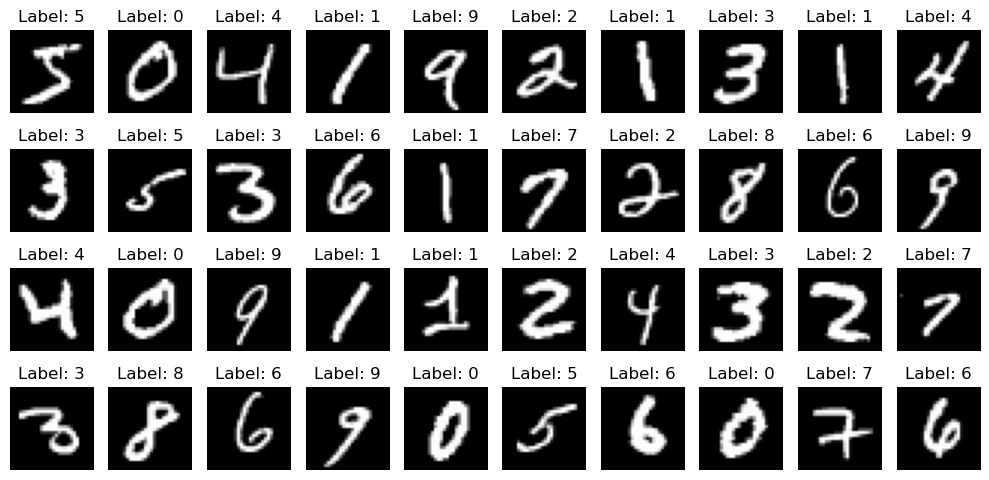

In [4]:
plt.figure(figsize=(10, 5))  

for i in range(40):  
    plt.subplot(4, 10, i+1)  
    plt.imshow(X[i].reshape(28, 28), cmap='gray')  
    plt.title('Label: ' + str(y[i]))  
    plt.axis('off')  

plt.tight_layout() 
plt.show()

In [5]:
print("Data type:", X.dtype)

Data type: float64


In [6]:
print(pd.DataFrame(X).describe())

           0        1        2        3        4        5        6        7    \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

In [7]:
# 导入必要的库
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
# Pre-Preprocess data
print("Preprocessing data...")
# 将像素值缩放到0到1之间
X = X / 255.0
# test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in test set:", X_test.shape[0])
print("Number of features:", X_train.shape[1])

Preprocessing data...
Number of samples in training set: 56000
Number of samples in test set: 14000
Number of features: 784


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# skape regression mode
print("Training logistic regression model...")
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

train_accuracy_lr = logistic_regression.score(X_train_scaled, y_train)
test_accuracy_lr = logistic_regression.score(X_test_scaled, y_test)
print("Accuracy of logistic regression on training set:", train_accuracy_lr)
print("Accuracy of logistic regression on test set:", test_accuracy_lr)

Training logistic regression model...
Accuracy of logistic regression on training set: 0.945625
Accuracy of logistic regression on test set: 0.9164285714285715


In [10]:
# skapa och träning random forest model
print("Training random forest model...")
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

train_accuracy_rf = random_forest.score(X_train, y_train)
test_accuracy_rf = random_forest.score(X_test, y_test)
print("Accuracy of random forest on training set:", train_accuracy_rf)
print("Accuracy of random forest on test set:", test_accuracy_rf)

Training random forest model...
Accuracy of random forest on training set: 1.0
Accuracy of random forest on test set: 0.9675


In [11]:
import joblib

joblib.dump(random_forest, 'C:/Users/armen/Downloads/EC-utbildning/2024-V.7-Machine learning/Xiaowen_Chen inlämningsuppgifter/random_forest_model(2).pkl')

joblib.dump(logistic_regression, 'C:/Users/armen/Downloads/EC-utbildning/2024-V.7-Machine learning/Xiaowen_Chen inlämningsuppgifter/logistic_regression_model(2).pkl')


['C:/Users/armen/Downloads/EC-utbildning/2024-V.7-Machine learning/Xiaowen_Chen inlämningsuppgifter/logistic_regression_model(2).pkl']